<a href="https://colab.research.google.com/github/DazzedUpDas/MYMLDLDAPROJECTS/blob/main/AdidasUSDatasetProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries and dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [ ]:
adidas_sales_df=pd.read_excel('/content/drive/MyDrive/Datasets/Adidas US Sales Dataset.xlsx')
adidas_sales_df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [ ]:
adidas_sales_df['Units Sold']=adidas_sales_df['Units Sold']*10
adidas_sales_df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,12000,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,10000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,10000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,8500,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,9000,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,640,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,1050,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,1840,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,700,2940.0,1234.80,0.42,Outlet


In [ ]:
adidas_sales_df['Invoice Date']=pd.to_datetime(adidas_sales_df['Invoice Date'])
adidas_sales_df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,12000,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,10000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,10000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,8500,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,9000,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,640,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,1050,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,1840,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,700,2940.0,1234.80,0.42,Outlet


In [ ]:
type(adidas_sales_df['Invoice Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
adidas_sales_df['Month']=adidas_sales_df['Invoice Date'].dt.month
adidas_sales_df['Year']=adidas_sales_df['Invoice Date'].dt.year
adidas_sales_df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,12000,600000.0,300000.00,0.50,In-store,1,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,10000,500000.0,150000.00,0.30,In-store,1,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,10000,400000.0,140000.00,0.35,In-store,1,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,8500,382500.0,133875.00,0.35,In-store,1,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,9000,540000.0,162000.00,0.30,In-store,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,640,3200.0,896.00,0.28,Outlet,1,2021
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,1050,4305.0,1377.60,0.32,Outlet,1,2021
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,1840,7544.0,2791.28,0.37,Outlet,2,2021
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,700,2940.0,1234.80,0.42,Outlet,2,2021


# **Data Visualization**

In [ ]:
adidas_sales_df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,12000,600000.0,300000.00,0.50,In-store,1,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,10000,500000.0,150000.00,0.30,In-store,1,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,10000,400000.0,140000.00,0.35,In-store,1,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,8500,382500.0,133875.00,0.35,In-store,1,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,9000,540000.0,162000.00,0.30,In-store,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,640,3200.0,896.00,0.28,Outlet,1,2021
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,1050,4305.0,1377.60,0.32,Outlet,1,2021
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,1840,7544.0,2791.28,0.37,Outlet,2,2021
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,700,2940.0,1234.80,0.42,Outlet,2,2021


<Axes: xlabel='Region', ylabel='count'>

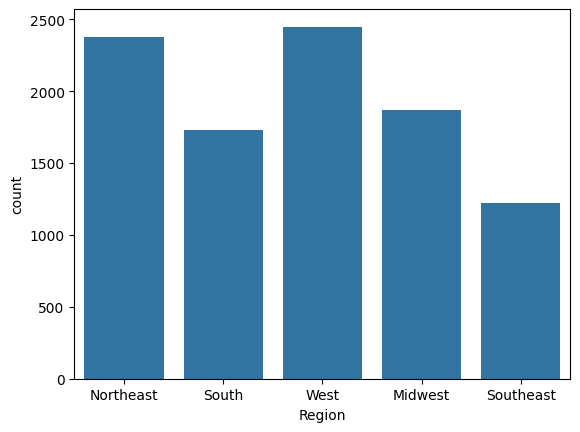

In [ ]:
sns.countplot(x='Region',data=adidas_sales_df)

## **Sales method being used**

In [ ]:
import plotly.express as px
fig=px.histogram(adidas_sales_df,x='Sales Method')
fig.show()

Online mode is the mode through which sales happen

## **Total Revenue generated by each sales method**

In [ ]:
data=adidas_sales_df.groupby('Sales Method')['Total Sales'].sum()
data=data.reset_index()
fig=px.bar(data,x='Sales Method',y='Total Sales')
fig.show()

Despite Online mode being used most of the time, the maximum revenue has been earned using In-store sales method

## **City Sales**

In [ ]:
import plotly.express as px
fig=px.histogram(adidas_sales_df,x='City')
fig.show()

Most sales happen in Portland

## **Region wise Sale of Units**

In [ ]:
data=adidas_sales_df.groupby('Region')['Units Sold'].sum()
data=data.reset_index()
fig=px.bar(data,x='Region',y='Units Sold')
fig.show()

## **Percentage of Profit by selling a type of product**

West has maximum sale with regards to units sold

In [ ]:
groupby_product=adidas_sales_df.groupby('Product')['Operating Profit'].sum()
groupby_product=groupby_product.reset_index()
fig=px.pie(groupby_product,values='Operating Profit',names='Product')
fig.show()

Men's Street Footwear is the product that's generating Maximum operating profit

## **Percentage of Average Operating Profit by selling a type of product**

In [ ]:
groupby_product=adidas_sales_df.groupby('Product')['Operating Profit'].mean()
groupby_product=groupby_product.reset_index()
fig=px.pie(groupby_product,values='Operating Profit',names='Product')
fig.show()

## **Percentage of Profit generated by region**

In [ ]:
region_data=adidas_sales_df.groupby('Region')['Operating Profit'].sum()
region_data=region_data.reset_index()
fig=px.pie(region_data,values='Operating Profit',names='Region')
fig.show()

West generates maximum profit

## **Percentage of Average Operating Profit generated by Region**

In [ ]:
region_data=adidas_sales_df.groupby('Region')['Operating Profit'].mean()
region_data=region_data.reset_index()
fig=px.pie(region_data,values='Operating Profit',names='Region')
fig.show()

## **Percentage of Operating Profit generated by City**

In [ ]:
city_data=adidas_sales_df.groupby('City')['Operating Profit'].sum()
city_data=city_data.reset_index()
fig=px.pie(city_data,values='Operating Profit',names='City')
fig.show()

In terms of Total Operating Profit, Charleston gives maximum contribution to Operating Profit

## **Percentage of Average Operating Profit generated by City**

In [ ]:
city_data=adidas_sales_df.groupby('City')['Operating Profit'].mean()
city_data=city_data.reset_index()
fig=px.pie(city_data,values='Operating Profit',names='City')
fig.show()

Miami has the highest Average Operating Profit

## **Retailer Count**

In [ ]:
fig=px.histogram(adidas_sales_df,x='Retailer')
fig.show()

## **Total Revenue obtained with regards to every retailer**

In [ ]:
fig=px.histogram(adidas_sales_df,x='Retailer',y='Total Sales')
fig.show()

In [ ]:
data=adidas_sales_df.groupby('Retailer')['Total Sales'].sum()
data=data.reset_index()
fig=px.bar(data,x='Retailer',y='Total Sales')
fig.show()

## **Total Operating Profit got from Retail sales**

In [ ]:
data=adidas_sales_df.groupby('Retailer')['Operating Profit'].sum()
data=data.reset_index()
fig=px.pie(data,values='Operating Profit',names='Retailer')
fig.show()

West Gear makes maximum operating profit

## **Average Operating Profit got from Retail sales**

In [ ]:
data=adidas_sales_df.groupby('Retailer')['Operating Profit'].mean()
data=data.reset_index()
fig=px.pie(data,values='Operating Profit',names='Retailer')
fig.show()

In [ ]:
data=adidas_sales_df.groupby('Retailer')['Operating Profit'].mean()
data=data.reset_index()
fig=px.bar(data,y='Operating Profit',x='Retailer')
fig.show()

Despite West Gear making maximum operating profit, Walmart has the better average in terms of Operating Profit

## **Total Sales in every month**

In [ ]:
adidas_sales_df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,12000,600000.0,300000.00,0.50,In-store,1,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,10000,500000.0,150000.00,0.30,In-store,1,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,10000,400000.0,140000.00,0.35,In-store,1,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,8500,382500.0,133875.00,0.35,In-store,1,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,9000,540000.0,162000.00,0.30,In-store,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,640,3200.0,896.00,0.28,Outlet,1,2021
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,1050,4305.0,1377.60,0.32,Outlet,1,2021
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,1840,7544.0,2791.28,0.37,Outlet,2,2021
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,700,2940.0,1234.80,0.42,Outlet,2,2021


In [ ]:
data=adidas_sales_df.groupby('Month')['Units Sold'].sum()
data=data.reset_index()
fig=px.bar(data,x='Month',y='Units Sold')
fig.show()

## **Total Revenue earned per month**

In [ ]:
data=adidas_sales_df.groupby('Month')['Total Sales'].sum()
data=data.reset_index()
fig=px.bar(data,x='Month',y='Total Sales')
fig.show()

## **Total Operating Profit per month**

In [ ]:
data=adidas_sales_df.groupby('Month')['Operating Profit'].sum()
data=data.reset_index()
fig=px.bar(data,x='Month',y='Operating Profit')
fig.show()

August has maximum Operating Profit

## **Average Operating Profit per month**

In [ ]:
data=adidas_sales_df.groupby('Month')['Operating Profit'].mean()
data=data.reset_index()
fig=px.bar(data,x='Month',y='Operating Profit')
fig.show()

July has maximum Average Operating Profit

# **Prophet Data Creation**

In [ ]:
Adidas_prophet=adidas_sales_df[['Invoice Date','Total Sales']]
Adidas_prophet

,Invoice Date,Total Sales
0,2020-01-01,600000.0
1,2020-01-02,500000.0
2,2020-01-03,400000.0
3,2020-01-04,382500.0
4,2020-01-05,540000.0
...,...,...
9643,2021-01-24,3200.0
9644,2021-01-24,4305.0
9645,2021-02-22,7544.0
9646,2021-02-22,2940.0


In [ ]:
Adidas_prophet=Adidas_prophet.rename(columns={'Invoice Date':'ds','Total Sales':'y'})
Adidas_prophet

,ds,y
0,2020-01-01,600000.0
1,2020-01-02,500000.0
2,2020-01-03,400000.0
3,2020-01-04,382500.0
4,2020-01-05,540000.0
...,...,...
9643,2021-01-24,3200.0
9644,2021-01-24,4305.0
9645,2021-02-22,7544.0
9646,2021-02-22,2940.0


# **Prediction Using Prophet**

In [ ]:
model=Prophet()
model.fit(Adidas_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpai8icjzq/9_tcwpbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpai8icjzq/gh497jwc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20807', 'data', 'file=/tmp/tmpai8icjzq/9_tcwpbn.json', 'init=/tmp/tmpai8icjzq/gh497jwc.json', 'output', 'file=/tmp/tmpai8icjzq/prophet_model77swapub/prophet_model-20240820140408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=3650)
forecast=model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,168552.450000,-23980.702503,3.256515e+05,168552.450000,1.685525e+05,-14875.911116,-14875.911116,-14875.911116,-1041.698444,-1041.698444,-1041.698444,-13834.212672,-13834.212672,-13834.212672,0.0,0.0,0.0,153676.538884
1,2020-01-02,168408.590342,-14029.616263,3.397189e+05,168408.590342,1.684086e+05,-4078.343350,-4078.343350,-4078.343350,12782.607750,12782.607750,12782.607750,-16860.951100,-16860.951100,-16860.951100,0.0,0.0,0.0,164330.246992
2,2020-01-03,168264.730685,-23048.645620,3.310285e+05,168264.730685,1.682647e+05,-13841.571293,-13841.571293,-13841.571293,5919.527336,5919.527336,5919.527336,-19761.098630,-19761.098630,-19761.098630,0.0,0.0,0.0,154423.159392
3,2020-01-04,168120.871027,-40773.130905,3.345376e+05,168120.871027,1.681209e+05,-31657.572779,-31657.572779,-31657.572779,-9158.283339,-9158.283339,-9158.283339,-22499.289439,-22499.289439,-22499.289439,0.0,0.0,0.0,136463.298249
4,2020-01-05,167977.011370,-32261.882829,3.117050e+05,167977.011370,1.679770e+05,-28940.474371,-28940.474371,-28940.474371,-3897.581596,-3897.581596,-3897.581596,-25042.892775,-25042.892775,-25042.892775,0.0,0.0,0.0,139036.536999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,2031-12-25,452623.498979,-164729.213100,1.143963e+06,-185813.295703,1.094547e+06,20452.686062,20452.686062,20452.686062,12782.607750,12782.607750,12782.607750,7670.078312,7670.078312,7670.078312,0.0,0.0,0.0,473076.185040
4370,2031-12-26,452722.343702,-241522.740513,1.088966e+06,-185972.340122,1.094718e+06,10751.701660,10751.701660,10751.701660,5919.527337,5919.527337,5919.527337,4832.174324,4832.174324,4832.174324,0.0,0.0,0.0,463474.045362
4371,2031-12-27,452821.188425,-225713.613875,1.088907e+06,-186131.384541,1.094888e+06,-7303.273964,-7303.273964,-7303.273964,-9158.283339,-9158.283339,-9158.283339,1855.009375,1855.009375,1855.009375,0.0,0.0,0.0,445517.914461
4372,2031-12-28,452920.033148,-235948.558866,1.109851e+06,-186290.428960,1.095059e+06,-5124.004817,-5124.004817,-5124.004817,-3897.581596,-3897.581596,-3897.581596,-1226.423221,-1226.423221,-1226.423221,0.0,0.0,0.0,447796.028331


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



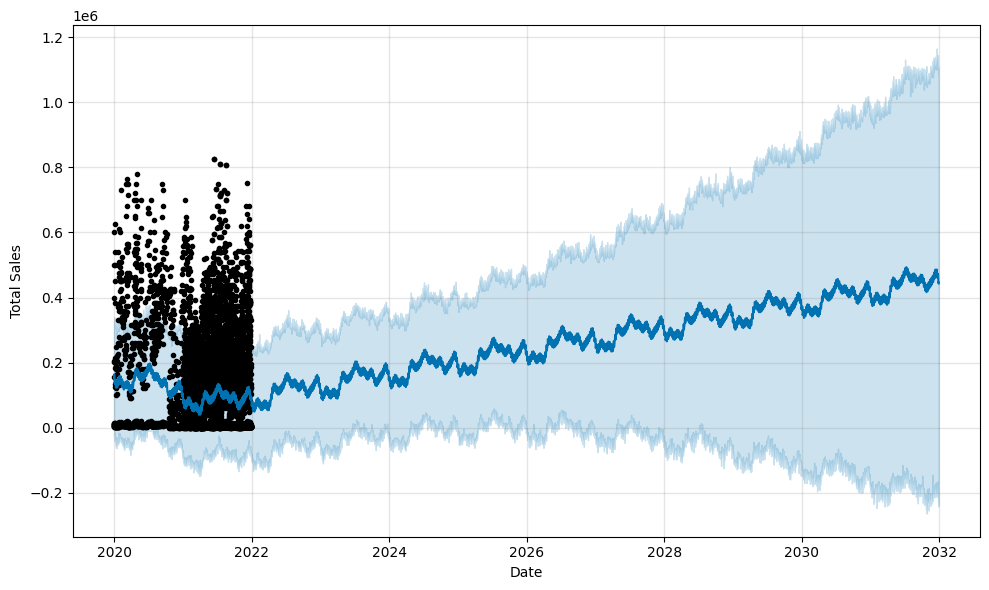

In [ ]:
figure=model.plot(forecast,xlabel='Date',ylabel='Total Sales')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



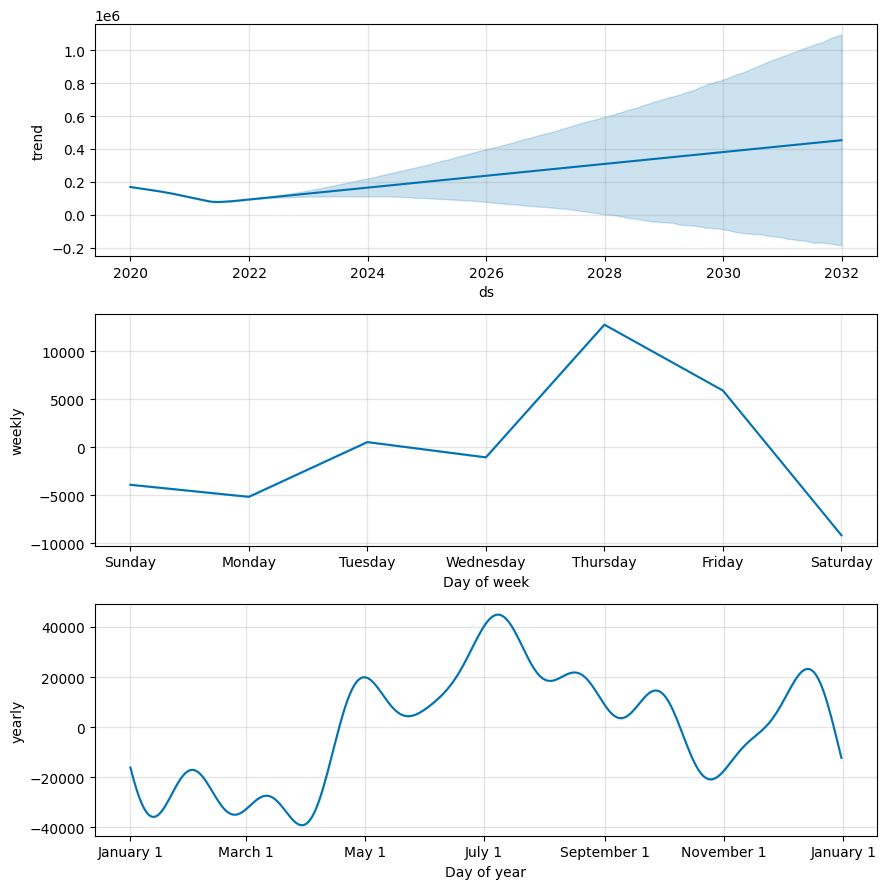

In [ ]:
seasonality=model.plot_components(forecast)

Thursday is the ideal day for sale of Adidas shoes and July is the ideal month with regards to total revenue

# **Prophet Prediction for the city of Boston**

In [ ]:
adidas_sales_df_boston=adidas_sales_df[adidas_sales_df['City']=='Boston']
adidas_sales_df_boston

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year
3672,Sports Direct,1185732,2021-02-15,Northeast,Massachusetts,Boston,Women's Athletic Footwear,35.0,2500,87500.0,21875.00,0.25,In-store,2,2021
3673,Sports Direct,1185732,2021-02-15,Northeast,Massachusetts,Boston,Men's Apparel,50.0,1500,75000.0,18750.00,0.25,In-store,2,2021
3674,Sports Direct,1185732,2021-02-15,Northeast,Massachusetts,Boston,Women's Apparel,40.0,2500,100000.0,30000.00,0.30,In-store,2,2021
3675,Sports Direct,1185732,2021-03-13,Northeast,Massachusetts,Boston,Men's Street Footwear,40.0,4700,188000.0,56400.00,0.30,In-store,3,2021
3676,Sports Direct,1185732,2021-03-13,Northeast,Massachusetts,Boston,Men's Athletic Footwear,40.0,1750,70000.0,21000.00,0.30,In-store,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,Amazon,1185732,2021-01-14,Northeast,Massachusetts,Boston,Men's Apparel,37.0,700,2590.0,1061.90,0.41,Outlet,1,2021
9500,Amazon,1185732,2021-01-14,Northeast,Massachusetts,Boston,Women's Apparel,34.0,1040,3536.0,1520.48,0.43,Outlet,1,2021
9501,Amazon,1185732,2021-02-12,Northeast,Massachusetts,Boston,Men's Street Footwear,33.0,1840,6072.0,2853.84,0.47,Outlet,2,2021
9502,Amazon,1185732,2021-02-12,Northeast,Massachusetts,Boston,Men's Athletic Footwear,33.0,720,2376.0,1116.72,0.47,Outlet,2,2021


## **Total Revenue Per month**

In [ ]:
data=adidas_sales_df_boston.groupby('Month')['Total Sales'].sum()
data=data.reset_index()
fig=px.bar(data,x='Month',y='Total Sales')
fig.show()

Maximum Revenue is earned in December

## **Average Operating Profit earned per month**

In [ ]:
data=adidas_sales_df_boston.groupby('Month')['Operating Profit'].mean()
data=data.reset_index()
fig=px.bar(data,x='Month',y='Operating Profit')
fig

<BarContainer object of 12 artists>

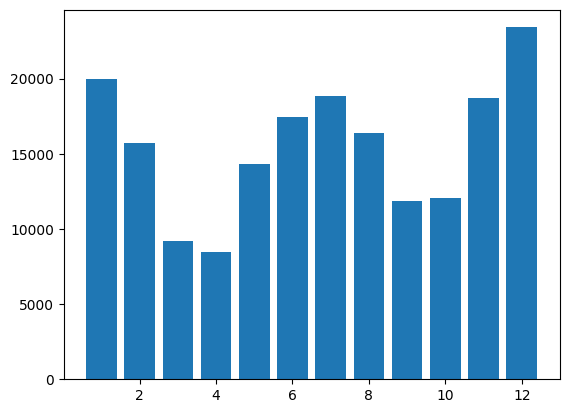

In [ ]:
plt.bar(data['Month'],data['Operating Profit'])

December is the month when total operating profit is the highest in Boston

## **Retail presence in Boston**

In [ ]:
fig=px.histogram(adidas_sales_df_boston,x='Retailer')
fig.show()

(array([150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  66.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

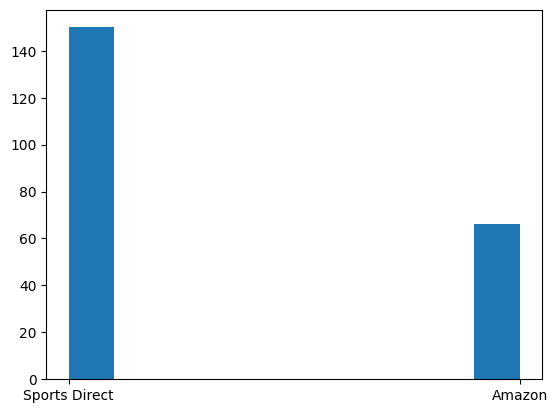

In [ ]:
plt.hist(adidas_sales_df_boston['Retailer'])

Sports Direct has done more sales

## **Average Operating Profit earned by the Retailers**

In [ ]:
data=adidas_sales_df_boston.groupby('Retailer')['Operating Profit'].mean()
data=data.reset_index()
fig=px.bar(data,x='Retailer',y='Operating Profit')
fig.show()

<BarContainer object of 2 artists>

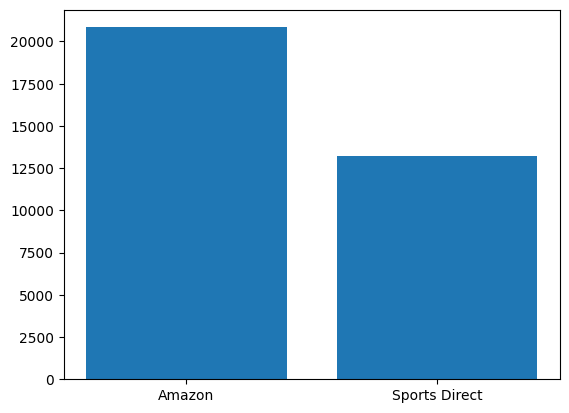

In [ ]:
plt.bar(data['Retailer'],data['Operating Profit'])

Despite Sports Direct doing more sales, Amazon has a better average Operating Profit

## **Product contribution to Total revenue earned from Boston**

In [ ]:
data=adidas_sales_df_boston.groupby('Product')['Total Sales'].sum()
data=data.reset_index()
fig=px.pie(data,values='Total Sales',names='Product')
fig.show()

([<matplotlib.patches.Wedge at 0x798cb35d8130>,
 [Text(1.0239457237600784, 0.4019143625120273, "Men's Apparel"),
  Text(0.37038993678319093, 1.035766042467962, "Men's Athletic Footwear"),
  Text(-0.9750629232496177, 0.5091682390957926, "Men's Street Footwear"),
  Text(-0.49405576347395225, -0.9828066455708215, "Women's Apparel"),
  Text(0.5199306830135477, -0.9693668474117866, "Women's Athletic Footwear"),
  Text(1.022970957336833, -0.4043889469871341, "Women's Street Footwear")],
 [Text(0.5585158493236791, 0.21922601591565125, '11.9%'),
  Text(0.2020308746090132, 0.5649632958916155, '15.3%'),
  Text(-0.5318525035907005, 0.27772813041588684, '30.4%'),
  Text(-0.269484961894883, -0.536076352129539, '20.1%'),
  Text(0.283598554371026, -0.5287455531337018, '10.4%'),
  Text(0.5579841585473635, -0.2205757892657095, '12.0%')])

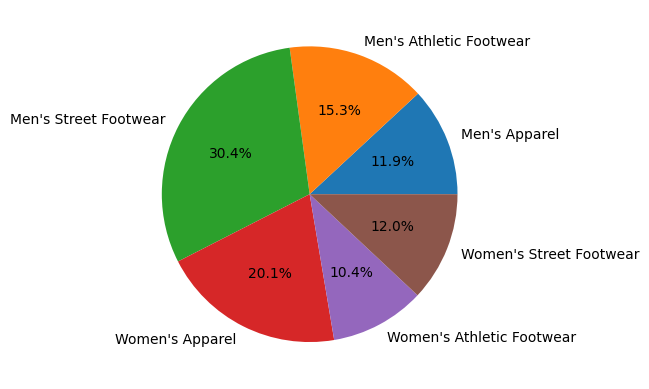

In [ ]:
plt.pie(data['Total Sales'],labels=data['Product'],autopct='%1.1f%%')

Men's street footwear has the maximum contribution to the Total revenue

## **Product contribution to average operating profit**

In [ ]:
data=adidas_sales_df_boston.groupby('Product')['Operating Profit'].mean()
data=data.reset_index()
fig=px.pie(data,values='Operating Profit',names='Product')
fig.show()

([<matplotlib.patches.Wedge at 0x798cb8126b90>,
 [Text(1.0419622049613375, 0.35258298800723203, "Men's Apparel"),
  Text(0.42855951821194516, 1.0130827899781665, "Men's Athletic Footwear"),
  Text(-1.0035045758330317, 0.45053142652002365, "Men's Street Footwear"),
  Text(-0.33748760130849537, -1.0469489571908643, "Women's Apparel"),
  Text(0.6374370205080433, -0.8964786918191802, "Women's Athletic Footwear"),
  Text(1.0383582439588228, -0.3630594403162519, "Women's Street Footwear")],
 [Text(0.5683430208880023, 0.19231799345849018, '10.4%'),
  Text(0.23375973720651552, 0.5525906127153635, '16.5%'),
  Text(-0.5473661322725627, 0.2457444144654674, '32.8%'),
  Text(-0.18408414616827018, -0.5710630675586532, '20.7%'),
  Text(0.34769292027711446, -0.4889883773559164, '8.9%'),
  Text(0.5663772239775396, -0.19803242199068286, '10.7%')])

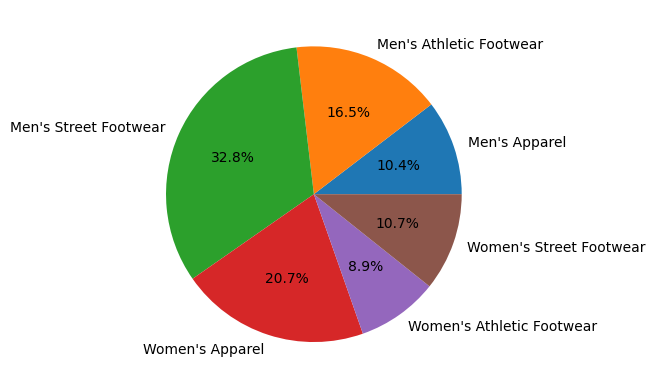

In [ ]:
plt.pie(data['Operating Profit'],labels=data['Product'],autopct='%1.1f%%')

Men's street footwear has maximum contribution to operating profit

## **Prophet Data Preparation**

In [ ]:
adidas_sales_df_boston_prophet=adidas_sales_df_boston[['Invoice Date','Total Sales']]
adidas_sales_df_boston_prophet=adidas_sales_df_boston_prophet.rename(columns={'Invoice Date':'ds','Total Sales':'y'})
adidas_sales_df_boston_prophet

,ds,y
3672,2021-02-15,87500.0
3673,2021-02-15,75000.0
3674,2021-02-15,100000.0
3675,2021-03-13,188000.0
3676,2021-03-13,70000.0
...,...,...
9499,2021-01-14,2590.0
9500,2021-01-14,3536.0
9501,2021-02-12,6072.0
9502,2021-02-12,2376.0


## **Prophet Prediction**

In [ ]:
model=Prophet()
model.fit(adidas_sales_df_boston_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpai8icjzq/a5lp5hyk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpai8icjzq/tnhb0c6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9508', 'data', 'file=/tmp/tmpai8icjzq/a5lp5hyk.json', 'init=/tmp/tmpai8icjzq/tnhb0c6z.json', 'output', 'file=/tmp/tmpai8icjzq/prophet_modeleqiauzvn/prophet_model-20240820142758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=3650)
forecast=model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-14,39543.871250,-57503.934881,141615.673281,39543.871250,39543.871250,5755.451000,5755.451000,5755.451000,5755.451000,5755.451000,5755.451000,0.0,0.0,0.0,45299.322250
1,2021-02-12,41435.575347,-69846.129665,145138.802033,41435.575347,41435.575347,-6387.973434,-6387.973434,-6387.973434,-6387.973434,-6387.973434,-6387.973434,0.0,0.0,0.0,35047.601913
2,2021-02-15,41631.271912,-53616.051633,150449.998261,41631.271912,41631.271912,1318.017851,1318.017851,1318.017851,1318.017851,1318.017851,1318.017851,0.0,0.0,0.0,42949.289763
3,2021-03-13,43327.308730,-65169.897445,153038.420065,43327.308730,43327.308730,-3638.096097,-3638.096097,-3638.096097,-3638.096097,-3638.096097,-3638.096097,0.0,0.0,0.0,39689.212633
4,2021-04-14,45416.427957,-78757.299685,138056.630826,45416.427957,45416.427957,-15340.017686,-15340.017686,-15340.017686,-15340.017686,-15340.017686,-15340.017686,0.0,0.0,0.0,30076.410271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,2031-12-07,299309.870663,199157.861999,403562.412704,299165.969075,299445.698907,5085.927255,5085.927255,5085.927255,5085.927255,5085.927255,5085.927255,0.0,0.0,0.0,304395.797919
3659,2031-12-08,299375.155685,197519.100069,399642.022127,299231.201841,299511.022372,1318.017851,1318.017851,1318.017851,1318.017851,1318.017851,1318.017851,0.0,0.0,0.0,300693.173535
3660,2031-12-09,299440.440706,217073.698785,415091.079877,299296.434295,299576.344457,13206.691112,13206.691112,13206.691112,13206.691112,13206.691112,13206.691112,0.0,0.0,0.0,312647.131817
3661,2031-12-10,299505.725727,187468.917034,392475.919992,299361.666749,299641.658080,-15340.017686,-15340.017686,-15340.017686,-15340.017686,-15340.017686,-15340.017686,0.0,0.0,0.0,284165.708041


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



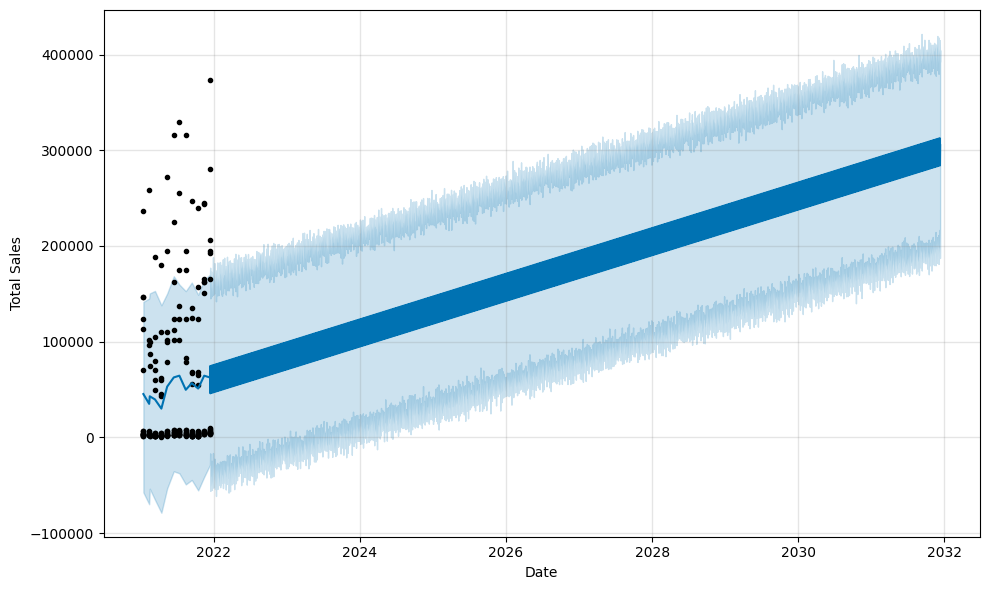

In [ ]:
figure=model.plot(forecast,xlabel='Date',ylabel='Total Sales')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



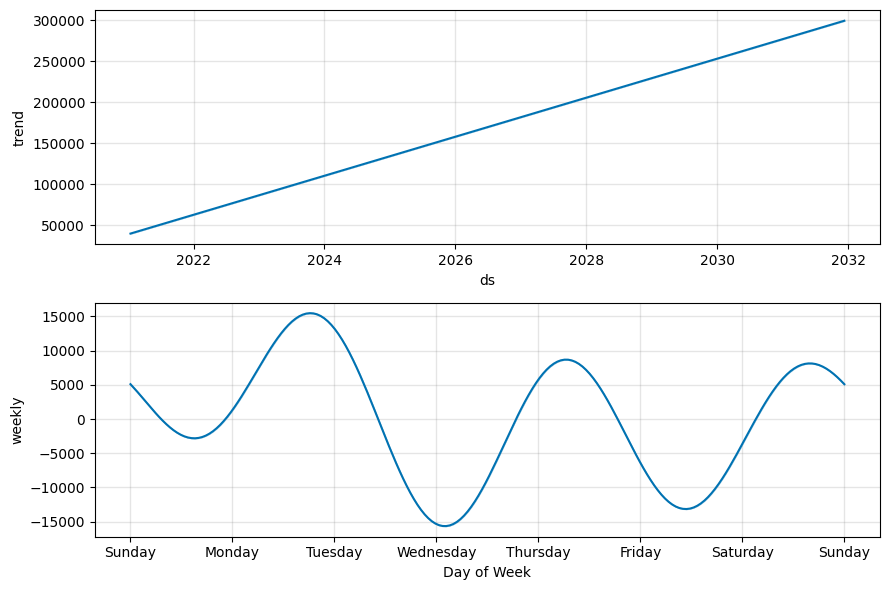

In [ ]:
seasonality=model.plot_components(forecast)

A constant increasing trend is seen and Tuesday is the perfect time for the company to earn maximum revenue